<a href="https://colab.research.google.com/github/deepan-31/ML-lab-programs-19CSE305-/blob/main/randomforest_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<h1> Random forest for titanic</h1>

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df1 = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])

In [ ]:
df1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
import numpy as np
age_1 = df1['Age'].values
median_of_age = np.nanmedian(age_1)

In [ ]:
print(median_of_age)

28.0


In [ ]:
d_1 = df1['Age'].fillna(median_of_age)

In [ ]:
df1 = df1.drop('Age',axis=1)
df1['Age'] = d_1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
data = df1[['Age','Fare']]

In [ ]:
df2 = scaler.fit_transform(data)

In [ ]:
print(df2)

[[0.27117366 0.01415106]
 [0.4722292  0.13913574]
 [0.32143755 0.01546857]
 ...
 [0.34656949 0.04577135]
 [0.32143755 0.0585561 ]
 [0.39683338 0.01512699]]


In [ ]:
scaled_data = pd.DataFrame(df2,columns=['Age','Fare'])

In [ ]:
scaled_data

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.346569,0.045771
889,0.321438,0.058556


In [ ]:
df1['Age'] = scaled_data['Age'].values
df1['Fare'] = scaled_data['Fare'].values

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['Sex']= label_encoder.fit_transform(df1['Sex'])
df1['Embarked']= label_encoder.fit_transform(df1['Embarked'])

In [ ]:
df1

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age
0,0,3,1,1,0,0.014151,2,0.271174
1,1,1,0,1,0,0.139136,0,0.472229
2,1,3,0,0,0,0.015469,2,0.321438
3,1,1,0,1,0,0.103644,2,0.434531
4,0,3,1,0,0,0.015713,2,0.434531
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,0.025374,2,0.334004
887,1,1,0,0,0,0.058556,2,0.233476
888,0,3,0,1,2,0.045771,2,0.346569
889,1,1,1,0,0,0.058556,0,0.321438


In [ ]:
x = df1.iloc[:,1:8]
y = df1.iloc[:,0]

In [ ]:
print(f"independent features dimensions is {x.shape}\ndependent features dimensions is {y.shape}")

independent features dimensions is (891, 7)
dependent features dimensions is (891,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42,n_jobs=-1,n_estimators = 50,oob_score=True,verbose=True)

In [ ]:
%%time
model = rf.fit(X_train,y_train)

CPU times: user 134 ms, sys: 23.2 ms, total: 157 ms
Wall time: 147 ms


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [ ]:
model.oob_score_

0.8057784911717496

In [ ]:
y_pred = model.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished


In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of random Forest with no hyperparameter tunning is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of random Forest with no hyperparameter tunning is 78.36%


#<h2>Random sampling with replacement</h2>

In [ ]:
x_1 = df1.sample(n=150,replace=True,random_state=41)
x_2 = df1.sample(n=150,replace=True,random_state=42)
x_3 = df1.sample(n=150,replace=True,random_state=43)
x_4 = df1.sample(n=150,replace=True,random_state=44)
x_5 = df1.sample(n=150,replace=True,random_state=45)

In [ ]:
xx1 = x_1.iloc[:,1:8]
xx2 = x_2.iloc[:,1:8]
xx3 = x_3.iloc[:,1:8]
xx4 = x_4.iloc[:,1:8]
xx5 = x_5.iloc[:,1:8]
yy1 = x_1.iloc[:,0]
yy2 = x_2.iloc[:,0]
yy3 = x_3.iloc[:,0]
yy4 = x_4.iloc[:,0]
yy5 = x_5.iloc[:,0]

In [ ]:
out_of_bag = pd.concat([x_1,x_2,x_3,x_4,x_5]).drop_duplicates(keep=False)
out_of_bagx = out_of_bag.iloc[:,1:8]
out_of_bagy = out_of_bag.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(xx1,yy1,random_state=42,test_size=0.3)
x2_train,x2_test,y2_train,y2_test = train_test_split(xx2,yy2,random_state=42,test_size=0.3)
x3_train,x3_test,y3_train,y3_test = train_test_split(xx3,yy3,random_state=42,test_size=0.3)
x4_train,x4_test,y4_train,y4_test = train_test_split(xx4,yy4,random_state=42,test_size=0.3)
x5_train,x5_test,y5_train,y5_test = train_test_split(xx5,yy5,random_state=42,test_size=0.3)

#<h1>No of estimators = 5</h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt1 = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10,criterion='gini')
dt2 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=15,criterion='gini')
dt3 = DecisionTreeClassifier(max_depth=15,max_leaf_nodes=20,criterion='gini')
dt4 = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=15,criterion='entropy')
dt5 = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=10,criterion='entropy')

In [ ]:
model1 = dt1.fit(x1_train,y1_train)
model2 = dt2.fit(x2_train,y2_train)
model3 = dt3.fit(x3_train,y3_train)
model4 = dt4.fit(x4_train,y4_train)
model5 = dt5.fit(x5_train,y5_train)

In [ ]:
y1_pred = model1.predict(x1_test)
y2_pred = model2.predict(x2_test)
y3_pred = model3.predict(x3_test)
y4_pred = model4.predict(x4_test)
y5_pred = model5.predict(x5_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of DecisionTree 1 is {accuracy_score(y1_test,y1_pred)*100:.2f}%")
print(f"Accuracy of DecisionTree 2 is {accuracy_score(y2_test,y2_pred)*100:.2f}%")
print(f"Accuracy of DecisionTree 3 is {accuracy_score(y3_test,y3_pred)*100:.2f}%")
print(f"Accuracy of DecisionTree 4 is {accuracy_score(y4_test,y4_pred)*100:.2f}%")
print(f"Accuracy of DecisionTree 5 is {accuracy_score(y5_test,y5_pred)*100:.2f}%")

Accuracy of DecisionTree 1 is 73.33%
Accuracy of DecisionTree 2 is 80.00%
Accuracy of DecisionTree 3 is 80.00%
Accuracy of DecisionTree 4 is 75.56%
Accuracy of DecisionTree 5 is 82.22%


In [ ]:
from scipy import stats as st
def randomforest(testx):
    y_pred = []
    y1_pred = model1.predict(testx)
    y2_pred = model2.predict(testx)
    y3_pred = model3.predict(testx)
    y4_pred = model4.predict(testx)
    y5_pred = model5.predict(testx)
    for i in range(len(list(y1_pred))):
        all_pred = []
        all_pred.append(y1_pred[i])
        all_pred.append(y2_pred[i])
        all_pred.append(y3_pred[i])
        all_pred.append(y4_pred[i])
        all_pred.append(y5_pred[i])
        maj = np.array(all_pred)
        majority_voting = st.mode(maj)
        y_pred.append(int(majority_voting[0]))
    return y_pred

In [ ]:
y_pred = randomforest(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of random Forest is {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy of random Forest is 83.21%


#<h1>GridSearchCV</h1>

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf, param_grid=params, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s


CPU times: user 4.54 s, sys: 288 ms, total: 4.83 s
Wall time: 2min


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              oob_score=True, random_state=42,
                                              verbose=True),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=5, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, oob_score=True, random_state=42,
                       verbose=True)

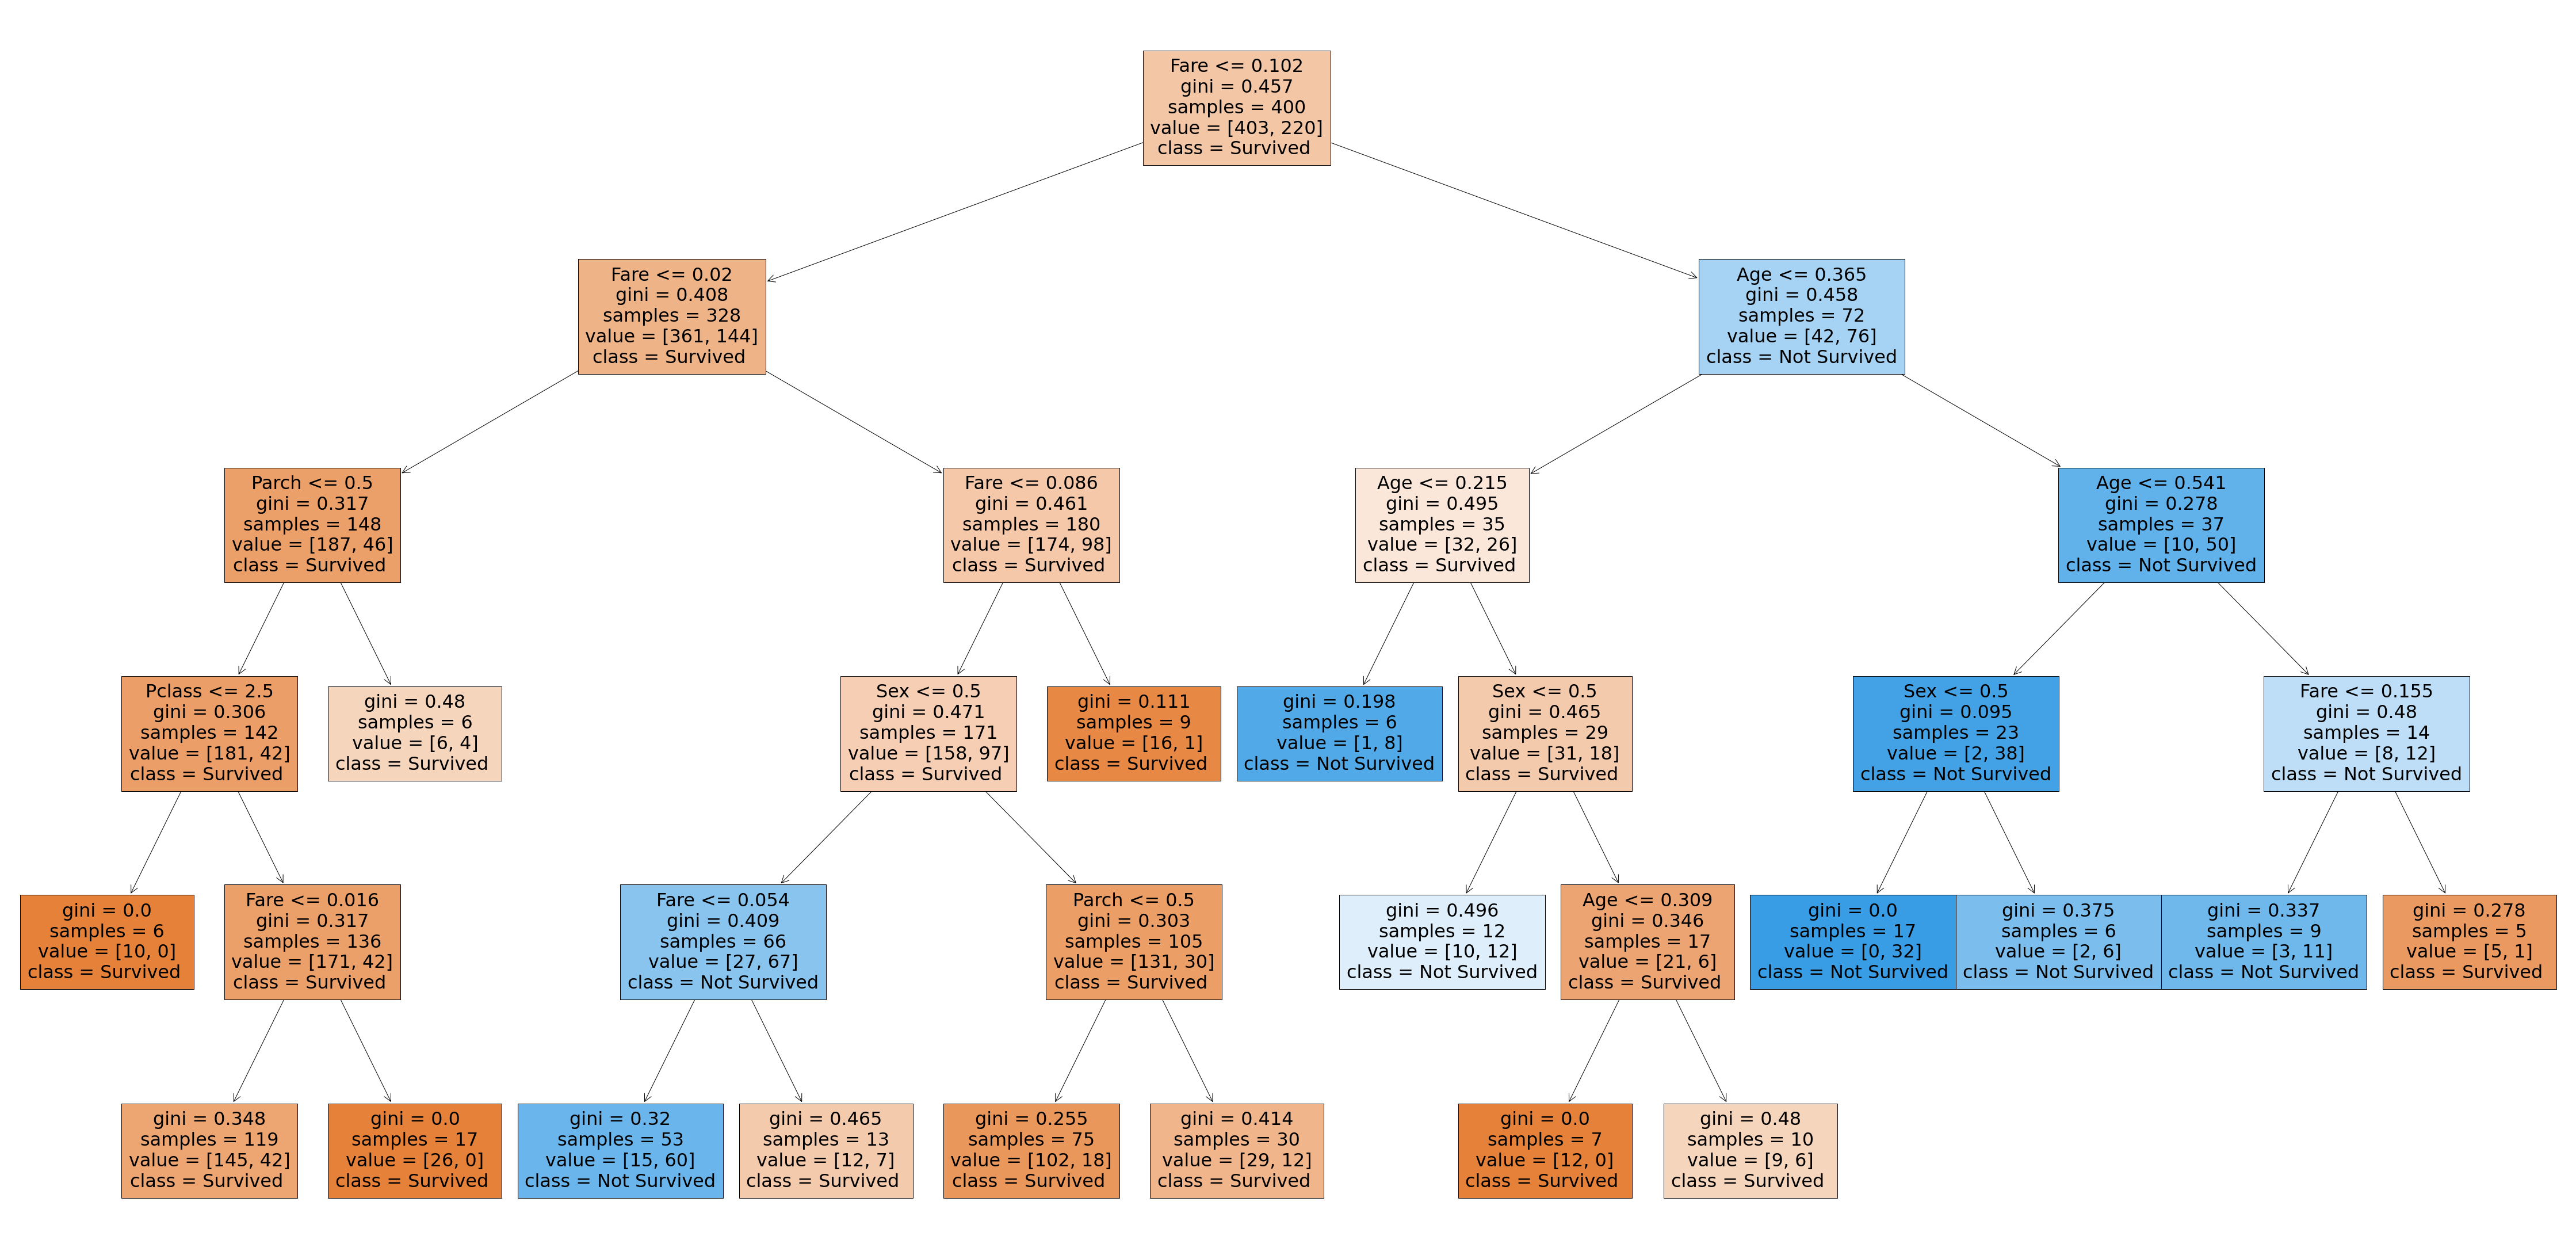

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
plot_tree(rf_best.estimators_[9], feature_names = X_train.columns,class_names=['Survived ', "Not Survived"],filled=True);

#<h1>RandomSearchCV</h1>